In [ ]:
# 1. TextBlob

In [1]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer, PatternAnalyzer

In [3]:
text = 'Apple is a very succcessful company due to its visionary leadership team. They have a very bright future'

In [5]:
blob = TextBlob(text)
blob.sentiment

Sentiment(polarity=0.24625000000000002, subjectivity=0.45)

In [10]:
blob = TextBlob(text, analyzer=NaiveBayesAnalyzer())
blob.sentiment

Sentiment(classification='pos', p_pos=0.8980227173699891, p_neg=0.10197728263001006)

In [11]:
text = 'There is a lockdown in Delhi due to covid19 pandemic'
blob = TextBlob(text, analyzer=NaiveBayesAnalyzer())
blob.sentiment

Sentiment(classification='pos', p_pos=0.8054351294202905, p_neg=0.1945648705797093)

In [15]:
# w/o patternAnalyzer parameter

blob = TextBlob(text)
blob.sentiment

Sentiment(polarity=-0.125, subjectivity=0.375)

In [16]:
blob = TextBlob(text, analyzer=PatternAnalyzer())
blob.sentiment

Sentiment(polarity=-0.125, subjectivity=0.375)

In [17]:
# 2. Word-Dictionary based

In [18]:
# http://mpqa.cs.pitt.edu/lexicons/subj_lexicon/

In [38]:
import pandas as pd

f = 'subjectivity_clues_hltemnlp05/subjclueslen1-HLTEMNLP05.tff'
df = pd.read_csv(f)
df.head(10)

,type=weaksubj len=1 word1=abandoned pos1=adj stemmed1=n priorpolarity=negative
0,type=weaksubj len=1 word1=abandonment pos1=nou...
1,type=weaksubj len=1 word1=abandon pos1=verb st...
2,type=strongsubj len=1 word1=abase pos1=verb st...
3,type=strongsubj len=1 word1=abasement pos1=any...
4,type=strongsubj len=1 word1=abash pos1=verb st...
5,type=weaksubj len=1 word1=abate pos1=verb stem...
6,type=weaksubj len=1 word1=abdicate pos1=verb s...
7,type=strongsubj len=1 word1=aberration pos1=ad...
8,type=strongsubj len=1 word1=aberration pos1=no...
9,type=strongsubj len=1 word1=abhor pos1=anypos ...


In [29]:
pos_words = []
neg_words = []

# Ignoring neutral, both and other polarities

with open('subjectivity_clues_hltemnlp05/subjclueslen1-HLTEMNLP05.tff') as file:
    for line in file:
        line_attrib = line.split()
        word = line_attrib[2].split('=')[1] # 2nd column in the file
        polarity = line_attrib[-1].split('=')[1] # last column in the file
        
        if polarity == 'positive':
            pos_words.append(word)
        elif polarity == 'negative':
            neg_words.append(word)

print("Total positive word count", len(pos_words))
print("Total negative word count", len(neg_words))
print(pos_words[1:10])

with open('pos_words.txt', mode='wt',encoding='utf-8') as myfile:
    myfile.write('\n'.join(pos_words))
    
with open('neg_words.txt', mode='wt',encoding='utf-8') as myfile:
    myfile.write("\n".join(neg_words))

Total positive word count 2718
Total negative word count 4911
['abidance', 'abide', 'abilities', 'ability', 'able', 'above', 'above-average', 'abound', 'absolve']


In [40]:
# Add any positive/ negative words
pos_word_add = ['lifted']

for w in pos_word_add:
    pos_words.append(w)
    
neg_word_add = ['covid', 'lockdown']
for w in neg_word_add:
    neg_words.append(w)

In [41]:
# Calculate sentiments based on word-dictionary

In [60]:
import nltk

def calc_sentiment_based_on_word_dict(text):
    sentiment_score = 0
    words = nltk.word_tokenize(text)
    
    for word in words:
        if word in pos_words:
            print('pos: ', word)
            print('len: ', len(word))
            sentiment_score = sentiment_score + 1
            print('sentiment_score: ', sentiment_score)
        if word in neg_words:
            print('neg: ', word)
            sentiment_score = sentiment_score - 1
    return sentiment_score/ len(words)

        

In [63]:
calc_sentiment_based_on_word_dict("This lockdown was caused by covid")

neg:  lockdown
neg:  covid


-0.3333333333333333

In [64]:
calc_sentiment_based_on_word_dict("This lockdown is now lifted")

neg:  lockdown
pos:  lifted
len:  6
sentiment_score:  0


0.0

In [66]:
calc_sentiment_based_on_word_dict("This lockdown is now lifted which \
                                  was caused by covid")

neg:  lockdown
pos:  lifted
len:  6
sentiment_score:  0
neg:  covid


-0.1

In [67]:
# 3. custom trained classifier

In [68]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
new_df = pd.read_csv('POS_NEG_NEWS.csv')
new_df

C:\Users\PRAFUL~1.KAM\AppData\Local\Temp/ipykernel_11112/1748307071.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,id,text,class,url
0,1,"Target stores announced yesterday that it will permanently raise its starting wage for U.S. team members to $15 per hour. Additionally, the company will give a one-time recognition bonus of $200.00 to its frontline store and distribution center hourly workers for their efforts during the coronavirus pandemic.\n\nAdditionally, starting this week, Target is also offering a new healthcare benefit that provides access to free virtual healthcare visits through the end of the year, regardless of whether team members are on a Target health insurance plan. The company also announced additional extensions of a 30-day paid leave for vulnerable team members, as well as free backup care for family members.\n\n“In the best of times, our team brings incredible energy and empathy to our work, and in harder times they bring those qualities plus extraordinary resilience and agility to keep,” said Target CEO Brian Cornell in a statement. “Everything we aspire to do and be as a company builds on the central role our team members play.”",POS,https://www.goodnewsnetwork.org/target-raises-minimum-wage-to-15/
1,2,"He grew up in a gentrified neighborhood with only a few African-American residents, but after confessing that he’s always felt uneasy walking alone on its streets, his faith in humanity was restored by dozens of neighbors who walked with him in solidarity.\n\nThe 29-year-old has lived in the 12 South neighborhood of Nashville his whole life, after his family moved there 54 years ago. But over the course of his life, Shawn Dromgoole has seen the neighborhood change dramatically.\n\nRising home values priced out many of the black families who lived there. As they moved out to find more affordable housing, new families moved in, most of them white and more financially well-off—leaving Shawn feeling out of place in his hometown.",POS,https://www.goodnewsnetwork.org/black-man-scared-to-walk-in-neighborhood-joined-by-75-neighbors/
2,3,"This teenage entrepreneur is responsible for inventing a simple, yet brilliant way to help curb coronavirus infections.\n\n15-year-old Max Melia designed and developed a wearable wristband which alerts users whenever they are about to touch their face\n\nHe first came up with the brilliant idea two years ago as a means of reducing the spread of the cold and flu. After both of Max’s parents contracted COVID-19 four months ago, however, he threw all his efforts into developing a working prototype.\n“Watching this pandemic unfold on the news, it was clear the devastating effect it was having on people lives’ across the world,” says Max. “However, it wasn’t until I saw the severity of the virus first-hand, when my parents both contracted COVID-19, did I truly appreciate just what we were dealing with.”\n\nThe tech-savvy English teen has since produced the VybPro, which warns users whenever they are about to subconsciously touch their face.\n\nThe gesture has been recognized as one of the key ways that coronavirus can be transmitted, making it a potentially live-saving invention.",POS,https://www.goodnewsnetwork.org/teen-invents-wristband-that-warns-against-touching-your-face/
3,4,"Making catalysts to convert waste carbon dioxide into useful industrial products has been expensive and complicated – until now. Australian engineers have shown it’s as easy as playing with Lego.\n\nChemical engineers from UNSW Sydney have developed new technology that helps convert harmful carbon dioxide emissions into chemical building blocks to make useful industrial products like fuel and plastics.\n\nAnd if adopted on a large scale, the process could give the world breathing space as it transitions towards a green economy.\n\n\nIn a paper published today in the journal Advanced Energy Materials, Dr Rahman Daiyan and Dr Emma Lovell from UNSW’s School of Chemical Engineering detail a way of creating nanoparticles that promote conversion of waste carbon dioxide into useful industrial components.\n\nThe researchers, 

In [75]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_recall_fscore_support as score

In [76]:
X = new_df['text']
y = new_df['class'].map({'POS':0, 'NEG':1})

In [79]:
# print(X)
print(y)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
Name: class, dtype: int64


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1, stratify=y)

In [82]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20,)
(20,)
(10,)
(10,)


In [86]:
# Vectorizing data

vectorizer = CountVectorizer(analyzer='word', max_df=0.9, 
                             max_features=1000, ngram_range=(1, 3))

X_train_dtm = vectorizer.fit_transform(X_train)
X_test_dtm = vectorizer.fit_transform(X_test)

print(X_train_dtm)
print(X_test_dtm)

  (0, 517)	1
  (0, 375)	2
  (0, 92)	2
  (0, 59)	1
  (0, 560)	2
  (0, 546)	4
  (0, 532)	1
  (0, 26)	1
  (0, 406)	3
  (0, 980)	2
  (0, 959)	2
  (0, 123)	2
  (0, 179)	2
  (0, 402)	3
  (0, 615)	5
  (0, 379)	2
  (0, 690)	3
  (0, 777)	1
  (0, 61)	3
  (0, 743)	3
  (0, 34)	2
  (0, 487)	1
  (0, 351)	2
  (0, 112)	3
  (0, 93)	1
  :	:
  (19, 505)	1
  (19, 518)	1
  (19, 551)	1
  (19, 326)	1
  (19, 900)	1
  (19, 253)	1
  (19, 501)	1
  (19, 963)	1
  (19, 324)	1
  (19, 325)	1
  (19, 841)	2
  (19, 697)	1
  (19, 14)	1
  (19, 190)	2
  (19, 146)	2
  (19, 415)	2
  (19, 6)	3
  (19, 307)	2
  (19, 191)	2
  (19, 918)	2
  (19, 7)	3
  (19, 805)	2
  (19, 8)	3
  (19, 696)	2
  (19, 806)	2
  (0, 851)	3
  (0, 163)	4
  (0, 755)	1
  (0, 459)	4
  (0, 954)	2
  (0, 64)	2
  (0, 427)	3
  (0, 123)	2
  (0, 127)	2
  (0, 108)	6
  (0, 46)	1
  (0, 543)	1
  (0, 148)	3
  (0, 271)	1
  (0, 10)	1
  (0, 499)	2
  (0, 473)	1
  (0, 18)	1
  (0, 21)	2
  (0, 295)	2
  (0, 66)	4
  (0, 20)	1
  (0, 971)	1
  (0, 349)	3
  (0, 839)	2
  :	:
  (9, 71

In [91]:
models = [MultinomialNB, LogisticRegression, SGDClassifier]

def fit_models(X_train, y_train, X_test, y_test, model):
    model = model()
    model.fit(X_train, y_train)
    return model

In [99]:
print('Naive Bayes')
%time model = fit_models(X_train_dtm,y_train,X_test_dtm,y_test,models[0])
# make class predictions for X_test_dtm
y_pred_class = model.predict(X_test_dtm)

# calculate accuracy of class predictions
print('Accuracy Score:',metrics.accuracy_score(y_test, y_pred_class))


# calculate precision and recall
print(classification_report(y_test, y_pred_class))


# calculate the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_class))

Naive Bayes
Wall time: 1.76 ms
Accuracy Score: 0.7
              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.75      0.60      0.67         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10

[[4 1]
 [2 3]]


In [100]:
print('Logistic Regression Bayes')
%time model = fit_models(X_train_dtm,y_train,X_test_dtm,y_test,models[1])
# make class predictions for X_test_dtm
y_pred_class = model.predict(X_test_dtm)

# calculate accuracy of class predictions
print('Accuracy Score:',metrics.accuracy_score(y_test, y_pred_class))

# calculate precision and recall
print(classification_report(y_test, y_pred_class))

# calculate the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_class))

Logistic Regression Bayes
Wall time: 26.9 ms
Accuracy Score: 0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.50      1.00      0.67         5

    accuracy                           0.50        10
   macro avg       0.25      0.50      0.33        10
weighted avg       0.25      0.50      0.33        10

[[0 5]
 [0 5]]


C:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [97]:
print('SVM')
%time model = fit_models(X_train_dtm,y_train,X_test_dtm,y_test,models[2])
# make class predictions for X_test_dtm
y_pred_class = model.predict(X_test_dtm)

# calculate accuracy of class predictions
print('Accuracy Score:',metrics.accuracy_score(y_test, y_pred_class))

# calculate precision and recall
print(classification_report(y_test, y_pred_class))

# calculate the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_class))
countVect_SVM_CM = metrics.confusion_matrix(y_test, y_pred_class)

SVM
Wall time: 3 ms
Accuracy Score: 0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.50      1.00      0.67         5

    accuracy                           0.50        10
   macro avg       0.25      0.50      0.33        10
weighted avg       0.25      0.50      0.33        10

[[0 5]
 [0 5]]


C:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [116]:
text1 = ["Today was a grim day for New Delhi where there happend communal riots and many people were killed in the clashes. The police arrested 100 people in connnection with the riots."]
val_vect = vectorizer.transform(text1)
%time y_pred_class = model.predict(val_vect)
print(y_pred_class)  # 1 = negative

Wall time: 1 ms
[1]


In [117]:
text2 = ["I am happy that university has given me scholarship for my Masters degree."]
print("val_vect", val_vect)
val_vect = vectorizer.transform(text2)
%time y_pred_class = model.predict(val_vect)
print(y_pred_class)  # 0 = positive

val_vect   (0, 2)	1
  (0, 63)	1
  (0, 138)	1
  (0, 172)	1
  (0, 230)	2
  (0, 243)	1
  (0, 280)	1
  (0, 362)	1
  (0, 493)	2
  (0, 494)	1
  (0, 500)	1
  (0, 893)	1
  (0, 911)	1
  (0, 945)	1
  (0, 957)	1
  (0, 967)	1
  (0, 978)	1
  (0, 979)	1
Wall time: 0 ns
[1]


In [119]:
#https://www.ndtv.com/world-news/dubai-supermarket-delivers-mango-in-lamborghini-2251965?pfrom=home-topstories
text3=["""A supermarket in Dubai is delivering Mangoes at the doorsteps of its customers in a green Lamborghini, a Gulf news report has said.
"The king should travel like a king," says Mohammad Jehanzeb, the managing director of the store at Dubai's Pakistan Supermarket.

Mohammad Jehanzeb delivers the pulpy fruit himself and also takes the customers on a short ride in the luxury car.

In order to avail the offer rolled out on the Facebook page of the famous supermarket, customers are required to make a minimum order of Dh100, the Gulf News report said.

"The idea is to put a smile on people's faces and make them feel special," says Mr Jehanzeb.

The videos of delighted mango lovers, taking a joy ride in the car, are doing rounds over the internet. Mangoes At Your Doorstep, Lamborghini Joyride: Dubai Supermarket's Offer
A supermarket in Dubai is delivering Mangoes at the doorsteps of its customers in a green Lamborghini.

"Each order takes about an hour. We do about 7-8 home deliveries a day but are hoping to ramp up the numbers to 12," he adds.

Arshad Khan, who hails from India's Lucknow, said that his children were excited after hearing the roar of the Lamborghini outside their Falcon City villa.

"For someone who hails from Lucknow -- the land of the famous dussheri and landga mangoes -- I was a bit skeptical about the taste of Pakistani mangoes. I ordered them for the sheer
experience of seeing them come to my place in a luxury supercar," Gulf News quoted Mr Khan as saying.

"It was quite exhilarating and I must confess that the mangoes were as delicious as the ones back home," he added."""]

In [120]:
val_vect = vectorizer.transform(text3)
%time y_pred_class = model.predict_proba(val_vect)
print(y_pred_class)

Wall time: 0 ns
[[0.35453458 0.64546542]]


In [121]:
#https://www.mirror.co.uk/news/uk-news/teen-accused-pc-andrew-harper-22247350
text4 =["""A teenager accused of murdering PC Andrew Harper said he "didn't give a f*** and complained that police were "discriminating" against travellers after he was arrested at a caravan site, 
a court heard.

Henry Long, 19, allegedly claimed he had been watching DVDs, including Fast and the Furious, with relatives at the time the officer Andrew Harper was dragged to his death behind a car.

He allegedly said "I don't give a f*** about any of this", as he was charged with murder on September 18, jurors heard.

The trio allegedly got rid of their mobile phones by the time police arrived at the traveller's site where they were arrested around 10 minutes after they returned from their getaway journey.

Long remarked "look at me, do I look like a murderer?", as officers detained him, the court heard. Prosecutors said he told "clear and deliberate lies" to distance himself from the 
horrific killing. He later admitted manslaughter ahead of the murder trial.

Mr Laidlaw said: "Police began, in numbers, to enter the Four Houses Corner site at about 11:44pm just 10 minutes or so after the three defendants had arrived back at the site in the SEAT.

"Henry Long along with Albert Bowers was found in a Fendt Diamond caravan in Plot 2 on the Four Houses Corner site.

"Neither man was found in possession of a mobile phone, and the police could not find any phone attributable to either defendant during their search of the caravan site.

"What becomes clear is that both young men had managed to get rid of their telephones - either by disposing of them or, as would appear more likely by passing them to other members of the 
travelling community who were not arrested."""]

In [122]:
val_vect = vectorizer.transform(text4)
%time y_pred_class = model.predict_proba(val_vect)
print(y_pred_class)

Wall time: 957 µs
[[0.31598578 0.68401422]]


In [123]:
# 4. Named Entity based on sentiment analysis (targetted)

In [124]:
import spacy
from spacy import displacy

In [128]:
# spacy.load('en_core_web_sm')

In [129]:
nlp = spacy.load("en_core_web_sm")

In [135]:
def spacy_ner(text):
    text = text.replace('\n', ' ')
    doc = nlp(text)
    entities = []
    labels = []
    position_start = []
    positon_end = []
    
    for ent in doc.ents:
        if ent.label_ in ['PERSON', 'ORG', 'GPE']:
            entities.append(ent)
            labels.append(ent.label_)
    return entities, labels


def fit_ner(df):
    """The dataframe should have a column named 'text'"""
    print('Fitting Spacy NER model...')
    ner = df['text'].apply(spacy_ner)
    ner_org = {}
    ner_per = {}
    ner_gpe = {}

    for x in ner:
        #print(list(x))
        for entity, label in zip(x[0],x[1]):
            #print(type(entity.text))
            if label =='ORG':
                ner_org[entity.text] = ner_org.get(entity.text,0) + 1
            elif label=='PERSON':
                ner_per[entity.text] = ner_per.get(entity.text,0) + 1
            else:
                ner_gpe[entity.text] = ner_gpe.get(entity.text,0) + 1

    return {'ORG':ner_org,'PER':ner_per,'GPE':ner_gpe}

In [136]:
named_entities = fit_ner(new_df)

Fitting Spacy NER model...


In [137]:
named_entities['ORG']

{'Target': 4,
 'Lego': 1,
 'Chemical': 1,
 'UNSW Sydney': 1,
 'Advanced Energy Materials': 1,
 'UNSW’s School of Chemical Engineering': 1,
 'Palme': 1,
 'the Research Institute of Horticulture': 1,
 'Kamryn & Friends: Bracelets for Unity and Justice': 1,
 'NFL': 1,
 'WCCO News': 1,
 'Senate': 3,
 'Criminal Justice Commission': 1,
 'House': 1,
 'Portland State University': 1,
 'The Star Spangled Banner': 1,
 'the Portland Opera': 1,
 'GNN': 2,
 'Black Lives Matter': 1,
 'Oxford University': 1,
 'BBC': 1,
 'Randomized Evaluation': 1,
 'the Murghazar Zoo': 1,
 'the Pakistan High Court': 1,
 'Islamabad Wildlife Management Board': 1,
 'Capitol Hill': 2,
 'the Great American Outdoors Act': 4,
 'the National Parks Service': 2,
 'the Appomattox Courthouse and Statue of Liberty': 2,
 'the Forest Service': 2,
 'the Bureau of Indian Education': 2,
 'the Bureau of Land Management': 2,
 'the Fish and Wildlife Service': 2,
 'the Land and Water Conservation Fund': 2,
 'the Natural Resources Managemen

In [138]:
named_entities['PER']

{'Brian Cornell': 1,
 'Shawn Dromgoole': 1,
 'Shawn': 1,
 'Max Melia': 1,
 'Max': 2,
 'Emma Lovell': 1,
 'Rose Amal': 1,
 'Reasons': 1,
 'Wolfgang Palme': 1,
 'Kamryn Johnson': 1,
 'Ron Johnson': 1,
 'George Floyd': 3,
 'Justin Amash': 1,
 'Tim Scott': 1,
 'Scott': 1,
 'Madisen Hallberg': 1,
 'Emmanuel Henreid': 1,
 'Hallberg': 1,
 'Onry': 1,
 'Peter Horby': 1,
 'Martin Landry': 1,
 'Cher': 1,
 'Kaavan': 2,
 'April Judd': 1,
 'Jody McDowell': 1,
 'McDowell': 1,
 'Tamil Nadu': 2,
 'Pennis': 4,
 'Arun Balagopalan': 2,
 'Jessie D. Gregory': 1,
 'Gresham': 1,
 'Stephen Nolan': 1,
 'Kevin Deboni': 1,
 'Nolan': 4,
 'Deboni': 1,
 'Caleb White': 1,
 'Irving Federman': 1,
 'David Brown': 1,
 'Brown': 1,
 'Stroger': 2,
 'Amaria J. Jones': 1,
 'E Palaniswami': 1,
 'Kanimozhi': 1,
 'Tuticorin': 1,
 'Henri Tiphagne': 1,
 'Saharan': 1,
 'Jeff Beamish': 2,
 'Wayne Deutsch': 1,
 'Jasean Francis': 1,
 'Charles Riley': 1,
 'Puma': 1,
 'Shilpi': 1,
 'Mrs Shilpi Agarwal': 1,
 'Uthra': 1,
 'Hari Sankar': 1

In [140]:
# Sentiment analysis based on named entities
# Targetted by finding sentences containing the named entities and 
# performing sentiment analysis on those sentences one by one 

In [141]:
from textblob import TextBlob
import nltk

In [151]:
def get_keyword_sentences(text,keyword):
    """Extract sentences containing the Named Entity/Keyword"""
    text = text.replace('\n', ' ')
    sentences = nltk.sent_tokenize(text)

    sent_of_interest = []
    for sent in sentences:
        if keyword in sent.lower():
            sent_of_interest.append(sent)
    return sent_of_interest if len(sent_of_interest)>0 else False


def get_sentiment(list_of_sent):
    """ Extract sentiment from a sentence using TextBlob Pattern Analyzer"""
    sentiment = 0
    count = 0

    if list_of_sent !=False:
        for sent in list_of_sent:
            blob = TextBlob(sent)
            sentiment += blob.sentiment.polarity
            count += len(sent)
    return sentiment/count if count!=0 else 0  

def extract_sentiment(df,keywords,top=10):
    """df: data for the cluster, keywords: ner for that cluster"""
    print('Extracting Sentiments using TextBlob...')
    keywords = sorted(keywords.items(),key=lambda x: x[1],reverse=True)
    sentiment_dict = {}
    for keyword,count in keywords[:top]:
        df['sentences'] = df['text'].apply(get_keyword_sentences,keyword=keyword.lower())
        keyword_sentiment = df['sentences'].apply(get_sentiment).sum()
        sentiment_dict[keyword] = keyword_sentiment
    return sentiment_dict

In [153]:
#  top 30 orgs
keywords = named_entities['ORG']
sentment_result_org = extract_sentiment(new_df, keywords, top=30)
sentment_result_org
sorted(sentment_result_org.items(), key=lambda x:x[1], reverse=True)

Extracting Sentiments using TextBlob...


[('GNN', 0.004569909563803812),
 ('the US House of Representatives', 0.0019907100199071),
 ('the Conservation Fund', 0.0019907100199071),
 ('the National Parks Service', 0.0017921146953405018),
 ('the Appomattox Courthouse and Statue of Liberty', 0.0017921146953405018),
 ('the Land and Water Conservation Fund', 0.0013941535496305815),
 ('the Natural Resources Management Act', 0.0013941535496305815),
 ('Target', 0.0012131536833410769),
 ('the Great American Outdoors Act', 0.0011459492888064317),
 ('Capitol Hill', 0.000883481597767312),
 ('Senate', 0.0007037413380270522),
 ('FDA', 0.0005633802816901409),
 ('Whole Foods', 0.0004136029411764706),
 ('DUI', 0.0003423736143555005),
 ('Deutsch', 5.835667600373482e-05),
 ('the Forest Service', 0.0),
 ('the Bureau of Indian Education', 0.0),
 ('the Bureau of Land Management', 0.0),
 ('the Fish and Wildlife Service', 0.0),
 ('Jayaraj', 0.0),
 ('NDTV', 0.0),
 ('Sonoma Tech Meteorologist', 0.0),
 ('Consumer Reports', -5.604395604395601e-05),
 ('Deb

In [155]:
#  top 30 PERSON
keywords = named_entities['PER']
sentment_result_org = extract_sentiment(new_df, keywords, top=30)
sentment_result_org
sorted(sentment_result_org.items(), key=lambda x:x[1], reverse=True)

Extracting Sentiments using TextBlob...


[('Brian Cornell', 0.002359882005899705),
 ('Cher', 0.0017907466352862498),
 ('Martin Landry', 0.0016826923076923078),
 ('Hallberg', 0.0014084507042253522),
 ('Ron Johnson', 0.0013736263736263737),
 ('Kaavan', 0.0013636363636363637),
 ('Shawn', 0.001013856032443393),
 ('Rose Amal', 0.0009461358313817331),
 ('Onry', 0.0009303774928774928),
 ('Max Melia', 0.0006799163179916319),
 ('Emma Lovell', 0.0006195786864931846),
 ('George Floyd', 0.0005177020708082832),
 ('Peter Horby', 0.0005165289256198347),
 ('April Judd', 0.0004651162790697674),
 ('Tim Scott', 0.0003012048192771084),
 ('Scott', 0.00023961661341853033),
 ('Nolan', 0.00020554291972032683),
 ('Reasons', 5.8685446009389656e-05),
 ('Wolfgang Palme', 5.8685446009389656e-05),
 ('Arun Balagopalan', 0.0),
 ('Jeff Beamish', 0.0),
 ('Shawn Dromgoole', 0.0),
 ('Madisen Hallberg', 0.0),
 ('Emmanuel Henreid', 0.0),
 ('Pennis', -0.00021367521367521362),
 ('Max', -0.0005604288499025341),
 ('Justin Amash', -0.0005889281507656066),
 ('Stroger',

In [156]:
# analyze book

In [158]:
book = open('book_cab_and_goose.txt',encoding="utf8").read()

In [159]:
blob = TextBlob(book, analyzer=NaiveBayesAnalyzer())
blob.sentiment

Sentiment(classification='pos', p_pos=1.0, p_neg=6.5736053249909995e-257)

In [ ]:
blob = TextBlob(book)
blob.sentiment

In [160]:
blob = TextBlob(book)

polarity = []
subjectivity = []
sentences = []
PatternAnalyzerDF = pd.DataFrame(columns=['sentence', 'polarity', 'subjectivity'])

for sentence in blob.sentences:
    polarity.append(sentence.sentiment.polarity)
    subjectivity.append(sentence.sentiment.subjectivity)
    sentences.append(str(sentence.raw))

PatternAnalyzerDF['sentence'] = sentences
PatternAnalyzerDF['polarity'] = polarity
PatternAnalyzerDF['subjectivity'] = subjectivity

PatternAnalyzerDF['sentence'] = PatternAnalyzerDF['sentence'].str.replace('\n', ' ')

In [161]:
PatternAnalyzerDF.head(10)

,sentence,polarity,subjectivity
0,"The Project Gutenberg eBook, Cab and Caboose, by Kirk Munroe This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever.",0.000000,0.000000
1,"You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org Title: Cab and Caboose The Story of a Railroad Boy Author: Kirk Munroe Release Date: September 4, 2007 [eBook #22497] Language: English ***START OF THE PROJECT GUTENBERG EBOOK CAB AND CABOOSE*** E-text prepared by Mark C. Orton, Linda McKeown, Anne Storer, and the Project Gutenberg Online Distributed Proofreading Team (http://www.pgdp.net) Note: Project Gutenberg also has an HTML version of this file which includes the original illustrations.",0.187500,0.375000
2,"See 22497-h.htm or 22497-h.zip: (http://www.gutenberg.net/dirs/2/2/4/9/22497/22497-h/22497-h.htm) or (http://www.gutenberg.net/dirs/2/2/4/9/22497/22497-h.zip) CAB AND CABOOSE The Story of a Railroad Boy by KIRK MUNROE OFFICERS OF THE NATIONAL COUNCIL Honorary President, THE HON.",-0.750000,1.000000
3,"WOODROW WILSON Honorary Vice-President, HON.",0.000000,0.000000
4,"WILLIAM H. TAFT Honorary Vice-President, COLONEL THEODORE ROOSEVELT President, COLIN H. LIVINGSTONE, Washington, D. C. Vice-President, B. L. DULANEY, Bristol, Tenn.",0.000000,0.000000
5,"Vice-President, MILTON A. McRAE, Detroit.",0.000000,0.000000
6,Mich.,0.000000,0.000000
7,"Vice-President, DAVID STARR JORDAN, Stanford University, Cal.",0.000000,0.000000
8,"Vice-President, F. L. SEELY, Asheville, N. C. Vice-President, A. STAMFORD WHITE, Chicago, Ill. Chief Scout, ERNEST THOMPSON SETON, Greenwich, Connecticut National Scout Commissioner, DANIEL CARTER BEARD, Flushing, N. Y.",0.000000,0.000000
9,"NATIONAL HEADQUARTERS BOY SCOUTS OF AMERICA THE FIFTH AVENUE BUILDING, 200 FIFTH AVENUE TELEPHONE GRAMERCY 545 NEW YORK CITY FINANCE COMMITTEE John Sherman Hoyt, Chairman August Belmont George D. Pratt Mortimer L. Schiff H. Rogers Winthrop GEORGE D. PRATT, Treasurer JAMES E. WEST, Chief Scout Executive ADDITIONAL MEMBERS OF THE EXECUTIVE BOARD Ernest P. Bicknell Robert Garrett Lee F. Hanmer John Sherman Hoyt Charles C. Jackson Prof. Jeremiah W. Jenks William D. Murray Dr. Charles P. Neill George D. Porter Frank Presbrey Edgar M. Robinson Mortimer L. Schiff Lorillard Spencer Seth Sprague Terry July 31st, 1913.",0.136364,0.454545


In [165]:
import matplotlib.pyplot as plt
PatternAnalyzerDF.sort_index(inplace=True)
sentiment_top_df = PatternAnalyzerDF.head(n=200)
pd.set_option('display.max_colwidth', 200)

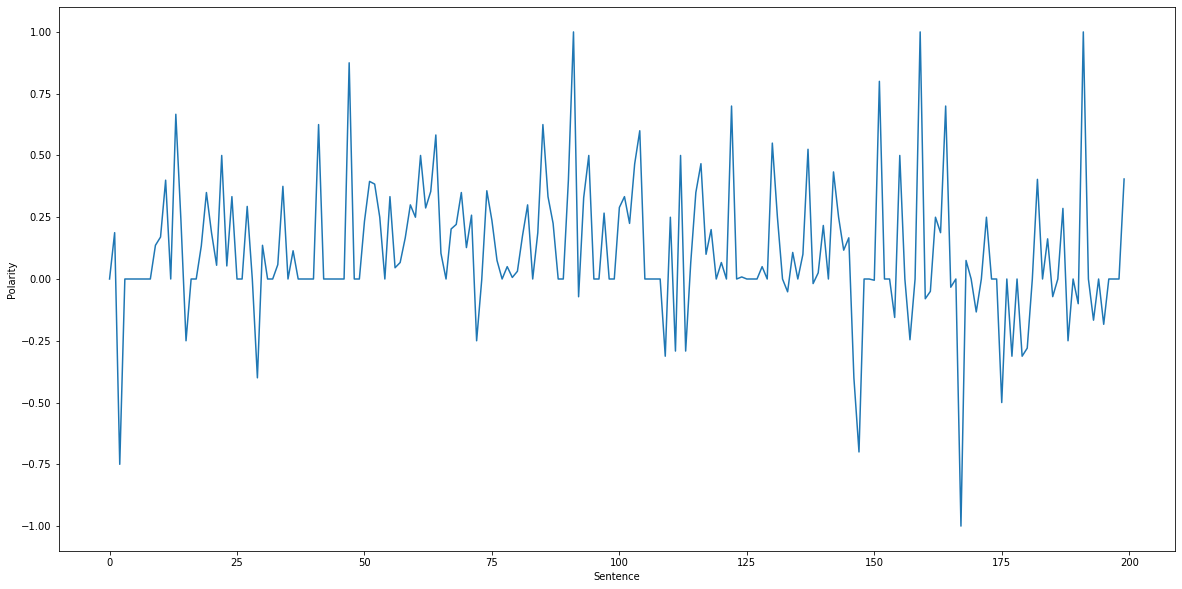

In [166]:
plt.figure().set_size_inches(20, 10)
plt.plot(sentiment_top_df['polarity'])
plt.xlabel('Sentence')
plt.ylabel('Polarity')
plt.show()